In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os

#Font size for the plots
plt.rcParams['font.size'] = '16'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

export_dir = '/home/pgonzalez/Dropbox/quant_datasetshift/'
quantificators = ["CC", "ACC", "PCC", "PACC"]
error = "MAE"
ps_train = [0.25, 0.5, 0.75]
ps_test = [0.25, 0.5, 0.75]
dateexperiment = "2022_09_24_01_17"

results_dict={}
print("Loading results... ",sep="")
for quant_name in quantificators:
    results_dict[quant_name] = pd.read_csv("results/covariate_cluster/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_dict[quant_name]['covariate_measure'] = results_dict[quant_name]['domainA_prop_train']-results_dict[quant_name]['domainA_prop_test']
    results_dict[quant_name]['covariate_measure'] = results_dict[quant_name]['covariate_measure'].round(1)
print("Done")


mean_error_methods = {}

writer = pd.ExcelWriter('results/covariate/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for p_train in ps_train:
    for p_test in ps_test:
        for quant_name in quantificators:
            exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
            #convert to matrix form
            results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
            results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
            results_mean.columns.name="domA prop test"
            results_mean.index.name="domA prop train"
            mean_error_methods[exp_id]=results_mean.mean().mean()
            print("Results for method %s. p_train: %f. p_test: %f. %s: %f" % (quant_name,p_train, p_test,error,mean_error_methods[exp_id]))
            cm = sns.light_palette('red', as_cmap=True)
            display(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1))
            results_mean.to_excel(writer, sheet_name=exp_id)
            workbook = writer.book
            worksheet = writer.sheets[exp_id]
            # Apply a conditional format to the cell range.
            worksheet.conditional_format('B2:L12', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.save()


Loading results... 
Done
Results for method CC. p_train: 0.250000. p_test: 0.250000. MAE: 0.025766


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.018,0.016,0.016,0.018,0.021,0.024,0.031,0.037,0.043,0.047
0.1,0.021,0.018,0.015,0.015,0.017,0.021,0.028,0.034,0.041,0.052,0.057
0.2,0.022,0.021,0.019,0.018,0.017,0.018,0.016,0.017,0.017,0.019,0.019
0.3,0.018,0.018,0.016,0.017,0.017,0.016,0.016,0.017,0.016,0.017,0.015
0.4,0.019,0.020,0.018,0.020,0.021,0.022,0.022,0.021,0.021,0.020,0.022
0.5,0.015,0.017,0.016,0.018,0.020,0.023,0.025,0.024,0.026,0.027,0.031
0.6,0.020,0.017,0.019,0.017,0.016,0.017,0.016,0.018,0.018,0.020,0.022
0.7,0.025,0.021,0.021,0.019,0.016,0.017,0.018,0.019,0.020,0.021,0.025
0.8,0.047,0.039,0.038,0.031,0.023,0.019,0.017,0.018,0.018,0.019,0.023


Results for method ACC. p_train: 0.250000. p_test: 0.250000. MAE: 0.029936


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.018,0.022,0.024,0.032,0.039,0.045,0.058,0.066,0.077,0.083
0.1,0.021,0.020,0.024,0.026,0.029,0.033,0.034,0.039,0.042,0.042,0.050
0.2,0.023,0.021,0.021,0.022,0.025,0.028,0.028,0.029,0.030,0.028,0.033
0.3,0.021,0.019,0.019,0.018,0.021,0.021,0.021,0.022,0.022,0.022,0.024
0.4,0.022,0.022,0.022,0.021,0.022,0.022,0.022,0.022,0.022,0.021,0.023
0.5,0.023,0.022,0.021,0.020,0.021,0.023,0.022,0.021,0.020,0.020,0.021
0.6,0.020,0.019,0.019,0.018,0.018,0.020,0.018,0.019,0.018,0.019,0.018
0.7,0.035,0.036,0.029,0.028,0.028,0.029,0.028,0.023,0.022,0.019,0.019
0.8,0.035,0.034,0.030,0.027,0.027,0.028,0.024,0.023,0.021,0.018,0.017


Results for method PCC. p_train: 0.250000. p_test: 0.250000. MAE: 0.017368


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.011,0.010,0.012,0.013,0.017,0.020,0.023,0.030,0.034,0.040,0.043
0.1,0.011,0.009,0.011,0.012,0.015,0.018,0.023,0.028,0.033,0.040,0.043
0.2,0.011,0.010,0.009,0.009,0.009,0.009,0.010,0.012,0.013,0.017,0.016
0.3,0.010,0.009,0.009,0.009,0.010,0.009,0.009,0.011,0.011,0.012,0.011
0.4,0.009,0.009,0.010,0.009,0.009,0.009,0.009,0.010,0.010,0.010,0.009
0.5,0.014,0.014,0.014,0.013,0.014,0.013,0.014,0.013,0.013,0.013,0.014
0.6,0.014,0.011,0.013,0.010,0.009,0.008,0.008,0.009,0.009,0.009,0.010
0.7,0.017,0.013,0.014,0.011,0.009,0.008,0.009,0.010,0.010,0.010,0.013
0.8,0.031,0.025,0.025,0.021,0.015,0.011,0.010,0.009,0.009,0.009,0.013


Results for method PACC. p_train: 0.250000. p_test: 0.250000. MAE: 0.025783


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.016,0.021,0.026,0.031,0.039,0.045,0.057,0.063,0.074,0.079
0.1,0.016,0.016,0.019,0.019,0.021,0.024,0.025,0.028,0.028,0.030,0.035
0.2,0.019,0.018,0.017,0.017,0.020,0.021,0.022,0.022,0.022,0.021,0.026
0.3,0.017,0.017,0.016,0.016,0.018,0.018,0.018,0.019,0.019,0.019,0.021
0.4,0.018,0.017,0.017,0.017,0.018,0.017,0.017,0.018,0.018,0.017,0.019
0.5,0.020,0.019,0.018,0.016,0.017,0.017,0.017,0.017,0.016,0.016,0.018
0.6,0.017,0.017,0.017,0.015,0.016,0.016,0.015,0.016,0.015,0.016,0.016
0.7,0.026,0.025,0.021,0.020,0.021,0.021,0.021,0.019,0.018,0.016,0.018
0.8,0.027,0.024,0.024,0.019,0.021,0.019,0.018,0.017,0.016,0.015,0.015


Results for method CC. p_train: 0.250000. p_test: 0.500000. MAE: 0.092399


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.057,0.067,0.082,0.095,0.110,0.122,0.131,0.148,0.160,0.171,0.185
0.1,0.058,0.068,0.081,0.095,0.109,0.122,0.132,0.146,0.157,0.173,0.185
0.2,0.060,0.062,0.069,0.076,0.080,0.086,0.088,0.097,0.100,0.110,0.114
0.3,0.073,0.073,0.078,0.080,0.083,0.084,0.084,0.089,0.090,0.096,0.096
0.4,0.064,0.061,0.062,0.062,0.061,0.061,0.058,0.060,0.059,0.061,0.060
0.5,0.072,0.068,0.067,0.066,0.063,0.060,0.055,0.055,0.051,0.051,0.048
0.6,0.104,0.097,0.094,0.091,0.086,0.081,0.074,0.072,0.067,0.065,0.060
0.7,0.118,0.110,0.104,0.100,0.092,0.085,0.075,0.071,0.063,0.060,0.052
0.8,0.160,0.147,0.138,0.130,0.117,0.106,0.093,0.086,0.075,0.066,0.056


Results for method ACC. p_train: 0.250000. p_test: 0.500000. MAE: 0.040627


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.024,0.021,0.027,0.043,0.063,0.081,0.095,0.118,0.136,0.152,0.172
0.1,0.025,0.028,0.030,0.034,0.037,0.041,0.046,0.050,0.056,0.057,0.062
0.2,0.027,0.029,0.029,0.030,0.032,0.034,0.040,0.039,0.043,0.041,0.048
0.3,0.022,0.022,0.020,0.024,0.022,0.023,0.026,0.027,0.028,0.028,0.030
0.4,0.027,0.026,0.024,0.026,0.026,0.026,0.029,0.030,0.028,0.029,0.030
0.5,0.027,0.028,0.025,0.025,0.025,0.024,0.027,0.025,0.025,0.023,0.024
0.6,0.024,0.023,0.020,0.022,0.022,0.021,0.023,0.022,0.022,0.020,0.021
0.7,0.050,0.048,0.045,0.040,0.037,0.035,0.036,0.031,0.029,0.024,0.022
0.8,0.055,0.053,0.048,0.042,0.039,0.036,0.036,0.028,0.027,0.021,0.019


Results for method PCC. p_train: 0.250000. p_test: 0.500000. MAE: 0.117352


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.091,0.099,0.112,0.124,0.135,0.146,0.154,0.168,0.177,0.189,0.199
0.1,0.092,0.099,0.109,0.120,0.130,0.139,0.146,0.157,0.165,0.177,0.186
0.2,0.094,0.096,0.101,0.107,0.110,0.115,0.116,0.124,0.126,0.133,0.137
0.3,0.100,0.099,0.103,0.106,0.108,0.110,0.109,0.114,0.114,0.119,0.119
0.4,0.103,0.101,0.102,0.104,0.104,0.105,0.103,0.107,0.105,0.108,0.107
0.5,0.108,0.105,0.104,0.105,0.103,0.102,0.097,0.098,0.096,0.097,0.093
0.6,0.124,0.119,0.117,0.116,0.112,0.109,0.103,0.102,0.098,0.098,0.093
0.7,0.134,0.127,0.123,0.120,0.114,0.109,0.101,0.099,0.093,0.090,0.084
0.8,0.162,0.153,0.145,0.140,0.130,0.122,0.112,0.107,0.098,0.093,0.084


Results for method PACC. p_train: 0.250000. p_test: 0.500000. MAE: 0.038654


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.018,0.026,0.044,0.063,0.082,0.096,0.120,0.137,0.157,0.176
0.1,0.024,0.025,0.026,0.029,0.030,0.034,0.040,0.041,0.044,0.044,0.051
0.2,0.029,0.029,0.029,0.029,0.030,0.031,0.038,0.035,0.038,0.036,0.042
0.3,0.024,0.024,0.023,0.025,0.024,0.024,0.029,0.027,0.028,0.027,0.030
0.4,0.029,0.028,0.028,0.027,0.026,0.025,0.029,0.026,0.027,0.025,0.027
0.5,0.028,0.027,0.027,0.025,0.024,0.023,0.027,0.024,0.024,0.021,0.025
0.6,0.024,0.023,0.022,0.022,0.020,0.019,0.023,0.021,0.021,0.018,0.021
0.7,0.044,0.043,0.040,0.035,0.034,0.032,0.035,0.030,0.030,0.025,0.025
0.8,0.045,0.042,0.039,0.034,0.032,0.028,0.032,0.024,0.024,0.019,0.019


Results for method CC. p_train: 0.250000. p_test: 0.750000. MAE: 0.183639


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.129,0.145,0.168,0.188,0.209,0.226,0.242,0.263,0.285,0.303,0.322
0.1,0.132,0.147,0.169,0.186,0.204,0.223,0.238,0.258,0.277,0.300,0.313
0.2,0.134,0.140,0.151,0.159,0.166,0.173,0.177,0.190,0.197,0.209,0.214
0.3,0.152,0.152,0.161,0.164,0.166,0.168,0.169,0.176,0.180,0.187,0.187
0.4,0.140,0.137,0.142,0.140,0.140,0.138,0.136,0.140,0.139,0.143,0.139
0.5,0.152,0.148,0.149,0.145,0.142,0.137,0.133,0.133,0.130,0.131,0.124
0.6,0.193,0.186,0.184,0.177,0.171,0.164,0.155,0.154,0.147,0.146,0.136
0.7,0.215,0.203,0.199,0.190,0.180,0.169,0.158,0.153,0.142,0.138,0.125
0.8,0.272,0.255,0.246,0.231,0.215,0.199,0.181,0.172,0.156,0.146,0.129


Results for method ACC. p_train: 0.250000. p_test: 0.750000. MAE: 0.052467


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.027,0.022,0.042,0.067,0.097,0.123,0.145,0.175,0.208,0.233,0.262
0.1,0.028,0.032,0.037,0.041,0.048,0.051,0.058,0.063,0.069,0.071,0.078
0.2,0.032,0.035,0.035,0.038,0.040,0.045,0.052,0.051,0.054,0.053,0.063
0.3,0.024,0.025,0.024,0.026,0.026,0.029,0.032,0.032,0.034,0.033,0.036
0.4,0.029,0.031,0.030,0.032,0.031,0.034,0.037,0.035,0.035,0.034,0.038
0.5,0.031,0.032,0.029,0.031,0.028,0.029,0.031,0.029,0.030,0.025,0.029
0.6,0.027,0.025,0.024,0.026,0.024,0.024,0.028,0.025,0.025,0.023,0.025
0.7,0.060,0.063,0.053,0.049,0.046,0.044,0.045,0.037,0.034,0.028,0.027
0.8,0.076,0.075,0.063,0.055,0.052,0.047,0.047,0.036,0.032,0.025,0.023


Results for method PCC. p_train: 0.250000. p_test: 0.750000. MAE: 0.230602


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.187,0.201,0.220,0.239,0.255,0.271,0.285,0.304,0.323,0.339,0.356
0.1,0.189,0.201,0.218,0.233,0.245,0.259,0.270,0.287,0.301,0.317,0.328
0.2,0.193,0.198,0.207,0.214,0.218,0.224,0.227,0.238,0.243,0.253,0.256
0.3,0.202,0.202,0.208,0.212,0.213,0.215,0.215,0.222,0.225,0.232,0.230
0.4,0.206,0.205,0.208,0.209,0.208,0.208,0.207,0.211,0.211,0.215,0.212
0.5,0.218,0.214,0.215,0.213,0.210,0.207,0.202,0.204,0.201,0.203,0.196
0.6,0.238,0.231,0.229,0.225,0.219,0.213,0.206,0.206,0.200,0.200,0.192
0.7,0.252,0.242,0.238,0.231,0.222,0.215,0.205,0.201,0.193,0.190,0.179
0.8,0.293,0.279,0.271,0.260,0.246,0.234,0.219,0.212,0.199,0.192,0.177


Results for method PACC. p_train: 0.250000. p_test: 0.750000. MAE: 0.055540


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.030,0.020,0.037,0.066,0.095,0.124,0.149,0.183,0.217,0.245,0.274
0.1,0.031,0.037,0.037,0.040,0.046,0.050,0.057,0.059,0.062,0.062,0.069
0.2,0.037,0.043,0.040,0.041,0.045,0.049,0.056,0.053,0.054,0.051,0.059
0.3,0.032,0.036,0.032,0.032,0.034,0.037,0.043,0.039,0.039,0.037,0.041
0.4,0.038,0.043,0.039,0.038,0.039,0.040,0.043,0.039,0.039,0.034,0.038
0.5,0.038,0.042,0.037,0.035,0.036,0.036,0.040,0.035,0.034,0.030,0.034
0.6,0.029,0.032,0.028,0.028,0.028,0.029,0.034,0.029,0.029,0.025,0.028
0.7,0.061,0.066,0.058,0.053,0.052,0.050,0.052,0.043,0.041,0.033,0.034
0.8,0.064,0.065,0.056,0.051,0.048,0.044,0.047,0.036,0.034,0.026,0.026


Results for method CC. p_train: 0.500000. p_test: 0.250000. MAE: 0.085108


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.067,0.066,0.059,0.058,0.053,0.051,0.050,0.042,0.041,0.039,0.039
0.1,0.071,0.076,0.074,0.080,0.084,0.089,0.091,0.093,0.096,0.097,0.103
0.2,0.076,0.080,0.077,0.083,0.084,0.089,0.090,0.091,0.092,0.093,0.097
0.3,0.074,0.078,0.074,0.076,0.079,0.083,0.083,0.081,0.084,0.083,0.086
0.4,0.075,0.077,0.072,0.077,0.077,0.081,0.080,0.078,0.080,0.079,0.081
0.5,0.079,0.081,0.075,0.080,0.080,0.084,0.084,0.080,0.083,0.081,0.084
0.6,0.079,0.079,0.075,0.077,0.078,0.081,0.079,0.077,0.077,0.074,0.076
0.7,0.084,0.086,0.079,0.081,0.081,0.084,0.083,0.078,0.080,0.077,0.077
0.8,0.090,0.091,0.084,0.085,0.085,0.087,0.084,0.080,0.079,0.075,0.077


Results for method ACC. p_train: 0.500000. p_test: 0.250000. MAE: 0.029556


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.020,0.024,0.026,0.033,0.036,0.039,0.048,0.054,0.059,0.062
0.1,0.020,0.018,0.022,0.021,0.023,0.024,0.024,0.030,0.032,0.036,0.035
0.2,0.019,0.016,0.021,0.018,0.021,0.021,0.022,0.025,0.027,0.029,0.029
0.3,0.021,0.019,0.022,0.020,0.021,0.020,0.019,0.020,0.021,0.021,0.021
0.4,0.020,0.017,0.021,0.018,0.021,0.020,0.019,0.021,0.021,0.022,0.021
0.5,0.021,0.019,0.020,0.018,0.019,0.020,0.018,0.019,0.019,0.019,0.018
0.6,0.023,0.020,0.023,0.020,0.021,0.019,0.018,0.019,0.019,0.021,0.017
0.7,0.023,0.020,0.021,0.018,0.019,0.019,0.018,0.018,0.016,0.018,0.014
0.8,0.028,0.026,0.028,0.025,0.025,0.021,0.020,0.021,0.019,0.020,0.017


Results for method PCC. p_train: 0.500000. p_test: 0.250000. MAE: 0.108998


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.094,0.095,0.092,0.091,0.091,0.091,0.092,0.087,0.086,0.085,0.087
0.1,0.091,0.095,0.093,0.097,0.100,0.105,0.106,0.107,0.109,0.110,0.114
0.2,0.094,0.097,0.095,0.097,0.101,0.104,0.105,0.104,0.105,0.106,0.109
0.3,0.096,0.099,0.096,0.097,0.100,0.103,0.103,0.101,0.102,0.101,0.104
0.4,0.106,0.108,0.105,0.105,0.106,0.108,0.107,0.105,0.104,0.103,0.105
0.5,0.105,0.106,0.102,0.103,0.103,0.105,0.103,0.100,0.100,0.098,0.100
0.6,0.108,0.108,0.104,0.104,0.104,0.106,0.104,0.100,0.099,0.097,0.098
0.7,0.115,0.115,0.110,0.109,0.109,0.109,0.107,0.103,0.101,0.098,0.099
0.8,0.124,0.123,0.118,0.115,0.114,0.114,0.111,0.106,0.103,0.099,0.099


Results for method PACC. p_train: 0.500000. p_test: 0.250000. MAE: 0.028682


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.019,0.022,0.023,0.026,0.028,0.029,0.035,0.038,0.041,0.042
0.1,0.017,0.017,0.023,0.022,0.024,0.024,0.026,0.032,0.034,0.039,0.037
0.2,0.018,0.016,0.020,0.018,0.019,0.018,0.019,0.022,0.024,0.025,0.024
0.3,0.020,0.018,0.020,0.020,0.019,0.017,0.018,0.021,0.020,0.021,0.020
0.4,0.019,0.018,0.019,0.018,0.019,0.018,0.017,0.020,0.020,0.022,0.019
0.5,0.019,0.018,0.020,0.017,0.019,0.016,0.016,0.019,0.018,0.020,0.016
0.6,0.023,0.021,0.023,0.022,0.020,0.017,0.017,0.020,0.020,0.021,0.017
0.7,0.024,0.021,0.022,0.020,0.019,0.017,0.016,0.018,0.017,0.017,0.015
0.8,0.026,0.024,0.026,0.023,0.022,0.018,0.017,0.019,0.018,0.018,0.015


Results for method CC. p_train: 0.500000. p_test: 0.500000. MAE: 0.020078


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.014,0.017,0.022,0.030,0.041,0.049,0.053,0.066,0.075,0.081,0.092
0.1,0.013,0.012,0.012,0.013,0.013,0.014,0.014,0.015,0.015,0.015,0.014
0.2,0.014,0.013,0.013,0.015,0.015,0.016,0.017,0.018,0.018,0.018,0.019
0.3,0.014,0.013,0.012,0.013,0.014,0.014,0.014,0.015,0.015,0.014,0.014
0.4,0.014,0.013,0.012,0.013,0.014,0.013,0.014,0.015,0.014,0.014,0.013
0.5,0.014,0.014,0.013,0.014,0.014,0.014,0.015,0.015,0.015,0.014,0.014
0.6,0.014,0.013,0.012,0.013,0.014,0.013,0.014,0.014,0.014,0.013,0.013
0.7,0.015,0.014,0.013,0.014,0.013,0.014,0.015,0.015,0.015,0.013,0.012
0.8,0.016,0.014,0.013,0.014,0.015,0.013,0.015,0.015,0.014,0.013,0.013


Results for method ACC. p_train: 0.500000. p_test: 0.500000. MAE: 0.027592


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.022,0.030,0.040,0.054,0.065,0.070,0.086,0.098,0.106,0.119
0.1,0.019,0.018,0.017,0.020,0.020,0.022,0.022,0.024,0.025,0.028,0.027
0.2,0.019,0.019,0.018,0.019,0.020,0.021,0.021,0.024,0.023,0.025,0.026
0.3,0.021,0.019,0.017,0.020,0.020,0.020,0.019,0.021,0.021,0.021,0.021
0.4,0.020,0.018,0.017,0.019,0.019,0.018,0.018,0.020,0.018,0.020,0.019
0.5,0.020,0.019,0.017,0.019,0.019,0.018,0.019,0.020,0.019,0.018,0.017
0.6,0.022,0.020,0.018,0.020,0.020,0.019,0.018,0.019,0.018,0.018,0.016
0.7,0.023,0.020,0.018,0.020,0.019,0.019,0.018,0.019,0.016,0.016,0.015
0.8,0.029,0.026,0.023,0.024,0.023,0.021,0.020,0.020,0.018,0.019,0.016


Results for method PCC. p_train: 0.500000. p_test: 0.500000. MAE: 0.014204


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.010,0.011,0.015,0.021,0.027,0.033,0.035,0.044,0.050,0.055,0.061
0.1,0.011,0.010,0.009,0.010,0.010,0.010,0.011,0.011,0.010,0.011,0.011
0.2,0.011,0.010,0.010,0.010,0.011,0.011,0.012,0.012,0.011,0.012,0.012
0.3,0.011,0.010,0.010,0.010,0.011,0.010,0.011,0.011,0.010,0.011,0.010
0.4,0.010,0.009,0.008,0.009,0.010,0.008,0.009,0.010,0.008,0.009,0.008
0.5,0.010,0.010,0.009,0.010,0.010,0.009,0.010,0.010,0.010,0.009,0.009
0.6,0.010,0.009,0.009,0.009,0.010,0.009,0.009,0.010,0.009,0.009,0.008
0.7,0.011,0.010,0.009,0.010,0.010,0.009,0.010,0.010,0.009,0.008,0.008
0.8,0.010,0.010,0.009,0.009,0.010,0.008,0.010,0.010,0.009,0.009,0.008


Results for method PACC. p_train: 0.500000. p_test: 0.500000. MAE: 0.024727


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.020,0.026,0.036,0.046,0.056,0.060,0.074,0.084,0.093,0.102
0.1,0.017,0.016,0.016,0.017,0.019,0.019,0.021,0.022,0.022,0.025,0.026
0.2,0.018,0.017,0.016,0.017,0.018,0.018,0.020,0.021,0.020,0.021,0.023
0.3,0.018,0.016,0.016,0.017,0.018,0.017,0.018,0.018,0.018,0.019,0.019
0.4,0.018,0.016,0.015,0.016,0.017,0.015,0.016,0.018,0.015,0.017,0.017
0.5,0.018,0.017,0.016,0.017,0.017,0.015,0.017,0.017,0.016,0.015,0.015
0.6,0.020,0.017,0.016,0.017,0.017,0.015,0.016,0.016,0.015,0.015,0.014
0.7,0.023,0.019,0.018,0.018,0.018,0.016,0.017,0.017,0.015,0.014,0.013
0.8,0.023,0.021,0.018,0.020,0.019,0.016,0.017,0.017,0.015,0.016,0.014


Results for method CC. p_train: 0.500000. p_test: 0.750000. MAE: 0.076536


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.073,0.084,0.101,0.116,0.132,0.144,0.155,0.171,0.190,0.201,0.216
0.1,0.067,0.067,0.073,0.074,0.077,0.078,0.078,0.084,0.085,0.092,0.090
0.2,0.067,0.065,0.069,0.068,0.070,0.068,0.066,0.071,0.070,0.075,0.072
0.3,0.069,0.066,0.070,0.069,0.069,0.068,0.065,0.069,0.069,0.073,0.070
0.4,0.071,0.066,0.071,0.069,0.069,0.066,0.063,0.067,0.065,0.069,0.066
0.5,0.073,0.069,0.073,0.070,0.070,0.067,0.064,0.067,0.064,0.068,0.064
0.6,0.076,0.074,0.076,0.074,0.073,0.069,0.065,0.068,0.065,0.069,0.064
0.7,0.077,0.072,0.075,0.073,0.070,0.068,0.063,0.065,0.061,0.065,0.060
0.8,0.086,0.080,0.083,0.079,0.076,0.073,0.068,0.069,0.065,0.068,0.062


Results for method ACC. p_train: 0.500000. p_test: 0.750000. MAE: 0.029647


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.023,0.040,0.058,0.079,0.093,0.108,0.128,0.154,0.167,0.188
0.1,0.019,0.019,0.021,0.020,0.022,0.022,0.023,0.024,0.025,0.028,0.028
0.2,0.020,0.019,0.020,0.020,0.021,0.022,0.024,0.025,0.025,0.025,0.027
0.3,0.021,0.018,0.020,0.020,0.020,0.020,0.022,0.022,0.022,0.024,0.023
0.4,0.020,0.019,0.019,0.020,0.020,0.019,0.020,0.021,0.018,0.019,0.018
0.5,0.022,0.020,0.021,0.020,0.020,0.020,0.021,0.020,0.021,0.019,0.020
0.6,0.021,0.019,0.021,0.020,0.020,0.017,0.020,0.018,0.018,0.018,0.017
0.7,0.022,0.020,0.020,0.020,0.019,0.018,0.019,0.018,0.017,0.017,0.016
0.8,0.029,0.024,0.025,0.024,0.022,0.019,0.020,0.020,0.019,0.019,0.017


Results for method PCC. p_train: 0.500000. p_test: 0.750000. MAE: 0.104997


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.096,0.106,0.119,0.131,0.142,0.153,0.160,0.174,0.188,0.198,0.208
0.1,0.086,0.087,0.093,0.096,0.098,0.101,0.102,0.108,0.111,0.117,0.116
0.2,0.088,0.087,0.091,0.092,0.093,0.093,0.091,0.096,0.096,0.101,0.099
0.3,0.093,0.092,0.095,0.096,0.096,0.095,0.093,0.097,0.097,0.102,0.098
0.4,0.103,0.101,0.103,0.104,0.103,0.102,0.099,0.103,0.102,0.106,0.102
0.5,0.100,0.098,0.100,0.099,0.098,0.096,0.093,0.096,0.094,0.097,0.092
0.6,0.107,0.104,0.106,0.105,0.102,0.100,0.096,0.098,0.096,0.099,0.094
0.7,0.111,0.107,0.108,0.106,0.103,0.101,0.096,0.098,0.095,0.097,0.092
0.8,0.124,0.119,0.119,0.116,0.112,0.109,0.103,0.105,0.101,0.102,0.096


Results for method PACC. p_train: 0.500000. p_test: 0.750000. MAE: 0.028725


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.020,0.034,0.053,0.071,0.088,0.101,0.123,0.146,0.162,0.180
0.1,0.018,0.019,0.020,0.019,0.020,0.022,0.024,0.024,0.023,0.025,0.026
0.2,0.019,0.020,0.019,0.019,0.021,0.023,0.027,0.025,0.026,0.025,0.028
0.3,0.018,0.019,0.018,0.018,0.019,0.021,0.023,0.022,0.023,0.022,0.023
0.4,0.019,0.019,0.018,0.018,0.020,0.019,0.022,0.021,0.019,0.019,0.019
0.5,0.019,0.019,0.019,0.019,0.019,0.020,0.021,0.019,0.020,0.018,0.018
0.6,0.018,0.018,0.017,0.018,0.017,0.016,0.020,0.018,0.018,0.016,0.016
0.7,0.022,0.022,0.020,0.019,0.018,0.017,0.021,0.017,0.017,0.016,0.015
0.8,0.022,0.021,0.020,0.020,0.018,0.017,0.021,0.018,0.018,0.016,0.015


Results for method CC. p_train: 0.750000. p_test: 0.250000. MAE: 0.185280


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.140,0.143,0.141,0.142,0.144,0.146,0.149,0.144,0.145,0.144,0.149
0.1,0.146,0.164,0.174,0.195,0.210,0.230,0.244,0.258,0.273,0.289,0.307
0.2,0.144,0.152,0.154,0.166,0.173,0.184,0.190,0.196,0.202,0.209,0.218
0.3,0.134,0.139,0.138,0.146,0.150,0.158,0.162,0.163,0.168,0.171,0.178
0.4,0.146,0.149,0.145,0.150,0.150,0.156,0.156,0.155,0.158,0.158,0.161
0.5,0.157,0.156,0.151,0.152,0.150,0.154,0.151,0.147,0.147,0.144,0.145
0.6,0.173,0.169,0.160,0.160,0.155,0.156,0.150,0.142,0.141,0.134,0.133
0.7,0.217,0.208,0.198,0.192,0.184,0.181,0.172,0.161,0.155,0.144,0.140
0.8,0.270,0.256,0.242,0.229,0.215,0.205,0.191,0.174,0.163,0.145,0.136


Results for method ACC. p_train: 0.750000. p_test: 0.250000. MAE: 0.053620


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.027,0.026,0.030,0.030,0.035,0.039,0.045,0.047,0.054,0.057,0.065
0.1,0.029,0.032,0.049,0.051,0.061,0.064,0.075,0.091,0.100,0.109,0.114
0.2,0.023,0.021,0.029,0.027,0.030,0.028,0.031,0.039,0.042,0.046,0.043
0.3,0.039,0.036,0.043,0.039,0.039,0.036,0.035,0.041,0.040,0.042,0.039
0.4,0.041,0.037,0.044,0.038,0.040,0.034,0.033,0.037,0.037,0.038,0.036
0.5,0.041,0.038,0.041,0.037,0.037,0.032,0.031,0.036,0.033,0.036,0.032
0.6,0.053,0.052,0.056,0.048,0.047,0.039,0.036,0.041,0.037,0.037,0.029
0.7,0.052,0.049,0.050,0.043,0.041,0.033,0.031,0.033,0.029,0.028,0.023
0.8,0.080,0.074,0.069,0.062,0.056,0.046,0.039,0.039,0.033,0.031,0.023


Results for method PCC. p_train: 0.750000. p_test: 0.250000. MAE: 0.232043


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.187,0.192,0.194,0.197,0.203,0.207,0.213,0.211,0.215,0.218,0.226
0.1,0.196,0.209,0.216,0.230,0.242,0.256,0.266,0.275,0.285,0.297,0.310
0.2,0.203,0.210,0.213,0.220,0.227,0.236,0.241,0.244,0.248,0.254,0.262
0.3,0.205,0.210,0.209,0.211,0.216,0.220,0.222,0.222,0.224,0.225,0.230
0.4,0.211,0.212,0.210,0.210,0.211,0.214,0.213,0.211,0.210,0.209,0.211
0.5,0.222,0.221,0.216,0.215,0.214,0.215,0.212,0.207,0.204,0.201,0.202
0.6,0.234,0.230,0.223,0.219,0.216,0.215,0.209,0.202,0.197,0.191,0.190
0.7,0.260,0.253,0.243,0.236,0.229,0.225,0.217,0.207,0.200,0.191,0.186
0.8,0.292,0.281,0.269,0.258,0.247,0.239,0.228,0.213,0.202,0.189,0.182


Results for method PACC. p_train: 0.750000. p_test: 0.250000. MAE: 0.051321


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.030,0.028,0.027,0.025,0.028,0.030,0.033,0.035,0.041,0.044,0.050
0.1,0.030,0.033,0.046,0.051,0.057,0.059,0.068,0.081,0.092,0.100,0.102
0.2,0.025,0.023,0.029,0.027,0.028,0.025,0.028,0.033,0.036,0.038,0.036
0.3,0.040,0.039,0.044,0.045,0.043,0.040,0.041,0.048,0.048,0.051,0.047
0.4,0.041,0.040,0.043,0.042,0.039,0.034,0.034,0.038,0.039,0.039,0.034
0.5,0.046,0.044,0.045,0.043,0.040,0.034,0.033,0.039,0.038,0.039,0.033
0.6,0.051,0.049,0.050,0.048,0.044,0.037,0.035,0.039,0.038,0.038,0.030
0.7,0.052,0.050,0.049,0.046,0.042,0.035,0.031,0.034,0.032,0.030,0.025
0.8,0.064,0.058,0.055,0.052,0.046,0.039,0.034,0.037,0.034,0.032,0.024


Results for method CC. p_train: 0.750000. p_test: 0.500000. MAE: 0.093447


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.063,0.060,0.057,0.054,0.051,0.048,0.051,0.048,0.048,0.048,0.048
0.1,0.067,0.078,0.091,0.103,0.112,0.124,0.139,0.150,0.160,0.172,0.182
0.2,0.061,0.068,0.074,0.078,0.084,0.090,0.099,0.103,0.108,0.111,0.117
0.3,0.053,0.058,0.062,0.065,0.068,0.071,0.079,0.081,0.085,0.085,0.090
0.4,0.062,0.065,0.067,0.067,0.068,0.070,0.076,0.076,0.078,0.077,0.079
0.5,0.070,0.071,0.072,0.070,0.068,0.069,0.072,0.070,0.070,0.065,0.066
0.6,0.082,0.080,0.078,0.076,0.072,0.071,0.071,0.068,0.066,0.059,0.058
0.7,0.116,0.110,0.106,0.100,0.094,0.090,0.088,0.082,0.076,0.067,0.063
0.8,0.154,0.145,0.138,0.127,0.118,0.109,0.103,0.092,0.084,0.070,0.062


Results for method ACC. p_train: 0.750000. p_test: 0.500000. MAE: 0.041965


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.025,0.029,0.031,0.036,0.042,0.045,0.047,0.053,0.059,0.060,0.066
0.1,0.027,0.032,0.035,0.040,0.049,0.055,0.054,0.061,0.071,0.077,0.084
0.2,0.021,0.021,0.021,0.024,0.027,0.028,0.026,0.030,0.032,0.036,0.036
0.3,0.034,0.032,0.030,0.031,0.031,0.032,0.027,0.029,0.028,0.032,0.030
0.4,0.035,0.033,0.031,0.031,0.031,0.030,0.025,0.026,0.026,0.028,0.027
0.5,0.033,0.033,0.028,0.029,0.030,0.028,0.025,0.027,0.024,0.027,0.025
0.6,0.044,0.043,0.038,0.038,0.037,0.033,0.027,0.028,0.025,0.028,0.023
0.7,0.046,0.043,0.038,0.037,0.034,0.031,0.027,0.027,0.022,0.023,0.019
0.8,0.067,0.058,0.050,0.047,0.044,0.038,0.030,0.030,0.024,0.025,0.019


Results for method PCC. p_train: 0.750000. p_test: 0.500000. MAE: 0.117790


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.090,0.089,0.089,0.088,0.086,0.084,0.088,0.084,0.083,0.082,0.082
0.1,0.097,0.104,0.113,0.121,0.127,0.134,0.146,0.152,0.158,0.166,0.174
0.2,0.101,0.106,0.110,0.113,0.118,0.121,0.129,0.131,0.134,0.137,0.142
0.3,0.102,0.104,0.106,0.107,0.110,0.111,0.116,0.116,0.117,0.118,0.120
0.4,0.101,0.101,0.102,0.102,0.102,0.103,0.106,0.105,0.104,0.103,0.104
0.5,0.109,0.108,0.107,0.105,0.104,0.104,0.106,0.103,0.101,0.099,0.098
0.6,0.115,0.113,0.111,0.107,0.104,0.102,0.102,0.098,0.094,0.090,0.088
0.7,0.136,0.131,0.127,0.122,0.117,0.112,0.111,0.105,0.099,0.092,0.088
0.8,0.160,0.153,0.147,0.138,0.132,0.124,0.120,0.111,0.103,0.094,0.088


Results for method PACC. p_train: 0.750000. p_test: 0.500000. MAE: 0.035623


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.026,0.027,0.031,0.036,0.040,0.039,0.046,0.051,0.054,0.058
0.1,0.021,0.026,0.028,0.031,0.039,0.042,0.042,0.047,0.057,0.063,0.069
0.2,0.020,0.020,0.018,0.020,0.022,0.022,0.022,0.023,0.026,0.029,0.030
0.3,0.029,0.029,0.027,0.029,0.029,0.029,0.026,0.029,0.030,0.033,0.033
0.4,0.031,0.030,0.027,0.028,0.028,0.026,0.023,0.024,0.024,0.027,0.025
0.5,0.033,0.031,0.028,0.029,0.029,0.025,0.023,0.024,0.023,0.025,0.024
0.6,0.037,0.035,0.031,0.031,0.031,0.028,0.023,0.023,0.023,0.024,0.021
0.7,0.039,0.037,0.032,0.031,0.030,0.027,0.023,0.023,0.021,0.022,0.019
0.8,0.048,0.040,0.035,0.036,0.032,0.028,0.023,0.024,0.021,0.021,0.018


Results for method CC. p_train: 0.750000. p_test: 0.750000. MAE: 0.026597


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.022,0.030,0.037,0.046,0.052,0.056,0.066,0.080,0.085,0.094
0.1,0.018,0.015,0.015,0.018,0.021,0.028,0.034,0.039,0.045,0.049,0.058
0.2,0.021,0.019,0.019,0.018,0.018,0.018,0.021,0.022,0.024,0.025,0.029
0.3,0.023,0.019,0.021,0.019,0.017,0.015,0.014,0.015,0.013,0.015,0.013
0.4,0.022,0.018,0.020,0.019,0.019,0.017,0.016,0.016,0.014,0.016,0.014
0.5,0.015,0.014,0.016,0.016,0.017,0.016,0.015,0.016,0.016,0.019,0.017
0.6,0.014,0.013,0.015,0.014,0.015,0.014,0.014,0.017,0.016,0.021,0.018
0.7,0.024,0.023,0.020,0.018,0.018,0.017,0.017,0.016,0.016,0.019,0.019
0.8,0.043,0.041,0.033,0.030,0.024,0.022,0.020,0.018,0.016,0.017,0.018


Results for method ACC. p_train: 0.750000. p_test: 0.750000. MAE: 0.032380


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.026,0.037,0.047,0.058,0.066,0.070,0.084,0.103,0.109,0.119
0.1,0.021,0.021,0.027,0.028,0.033,0.031,0.035,0.040,0.043,0.051,0.048
0.2,0.019,0.018,0.020,0.020,0.024,0.021,0.023,0.025,0.025,0.031,0.030
0.3,0.026,0.021,0.026,0.024,0.024,0.023,0.022,0.024,0.021,0.026,0.022
0.4,0.026,0.021,0.025,0.024,0.025,0.022,0.021,0.023,0.020,0.023,0.020
0.5,0.024,0.021,0.024,0.021,0.024,0.021,0.020,0.021,0.020,0.022,0.019
0.6,0.031,0.027,0.030,0.026,0.027,0.023,0.021,0.023,0.019,0.022,0.018
0.7,0.035,0.029,0.031,0.027,0.027,0.024,0.023,0.022,0.020,0.022,0.018
0.8,0.044,0.035,0.036,0.032,0.031,0.027,0.023,0.023,0.020,0.021,0.017


Results for method PCC. p_train: 0.750000. p_test: 0.750000. MAE: 0.019681


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.011,0.014,0.020,0.025,0.030,0.035,0.036,0.045,0.053,0.058,0.062
0.1,0.010,0.010,0.010,0.013,0.015,0.020,0.025,0.026,0.030,0.031,0.038
0.2,0.010,0.010,0.009,0.010,0.012,0.014,0.017,0.017,0.019,0.018,0.023
0.3,0.009,0.009,0.009,0.010,0.010,0.011,0.012,0.011,0.012,0.012,0.013
0.4,0.017,0.016,0.016,0.016,0.016,0.015,0.015,0.015,0.014,0.014,0.013
0.5,0.015,0.015,0.015,0.015,0.016,0.016,0.016,0.015,0.015,0.016,0.015
0.6,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.017,0.019,0.017
0.7,0.020,0.019,0.017,0.015,0.015,0.014,0.014,0.013,0.012,0.015,0.013
0.8,0.031,0.029,0.023,0.020,0.018,0.015,0.014,0.011,0.009,0.010,0.010


Results for method PACC. p_train: 0.750000. p_test: 0.750000. MAE: 0.025646


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.022,0.032,0.043,0.055,0.065,0.070,0.086,0.104,0.113,0.124
0.1,0.016,0.015,0.018,0.018,0.022,0.020,0.025,0.027,0.029,0.036,0.035
0.2,0.017,0.016,0.016,0.016,0.018,0.017,0.020,0.021,0.021,0.024,0.024
0.3,0.019,0.016,0.018,0.018,0.019,0.018,0.019,0.020,0.021,0.023,0.021
0.4,0.021,0.017,0.019,0.018,0.019,0.017,0.018,0.019,0.018,0.020,0.018
0.5,0.021,0.018,0.019,0.018,0.019,0.018,0.018,0.018,0.018,0.019,0.016
0.6,0.022,0.018,0.020,0.019,0.020,0.016,0.017,0.016,0.017,0.017,0.014
0.7,0.025,0.021,0.022,0.019,0.020,0.018,0.018,0.017,0.016,0.017,0.014
0.8,0.028,0.021,0.023,0.022,0.021,0.019,0.017,0.018,0.016,0.016,0.013


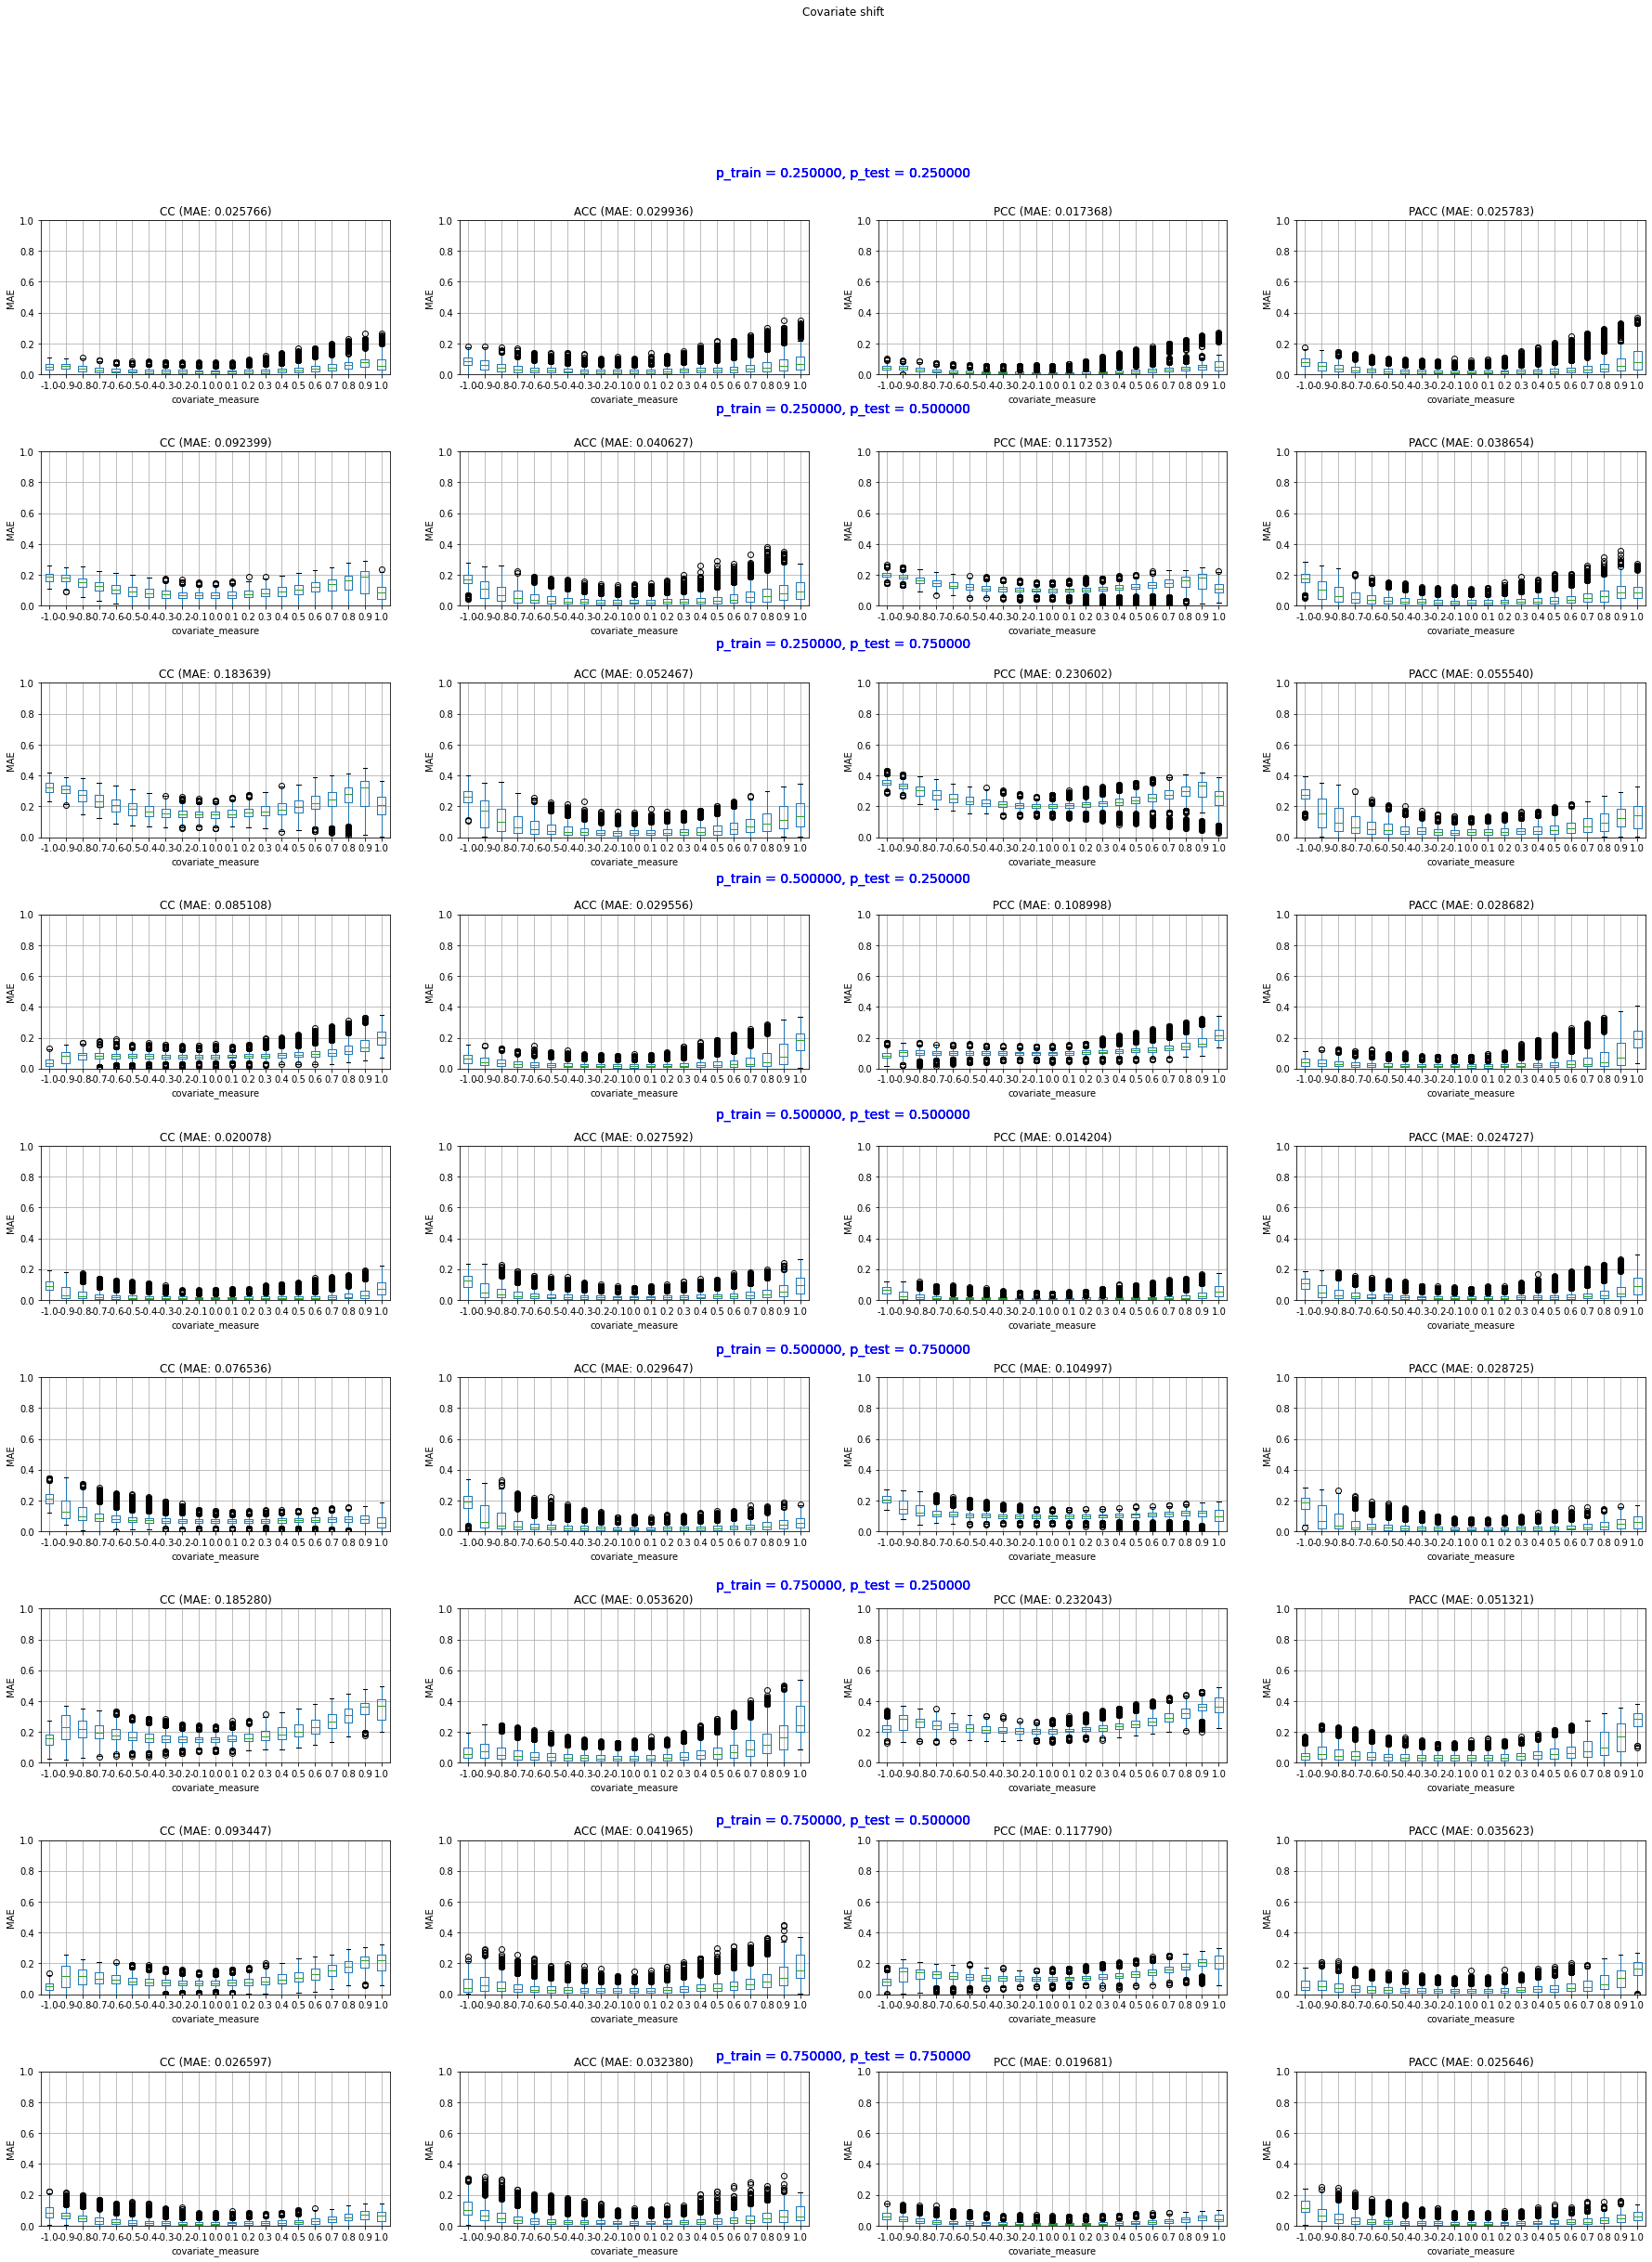

In [2]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(len(ps_test)*len(ps_train),len(quantificators),figsize=(30,40))
plt.subplots_adjust(hspace=0.5)
for i, p_train in enumerate(ps_train):
    for j, p_test in enumerate(ps_test):
        for k,quant_name in enumerate(quantificators):
            exp_id = "%s_%f_%f" % (quant_name, p_train, p_test)
            row = i*len(ps_train)+j
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            ax[row][k].set_ylim(0, 1)
            ax[row][k].set_ylabel(error)
            ax[row][k].xaxis.set_major_locator(ticker.MultipleLocator(3))
            results.boxplot(ax=ax[row][k],column='error',by='covariate_measure')
            plt.suptitle('Covariate shift')
            ax[row][k].set_title("%s (%s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
            plt.figtext(0.5,0.92-((i*len(ps_train)+j)*0.088), "p_train = %f, p_test = %f" % (p_train,p_test), ha="center", va="top", fontsize=14, color="b")


### Tables and charts to be included in a paper

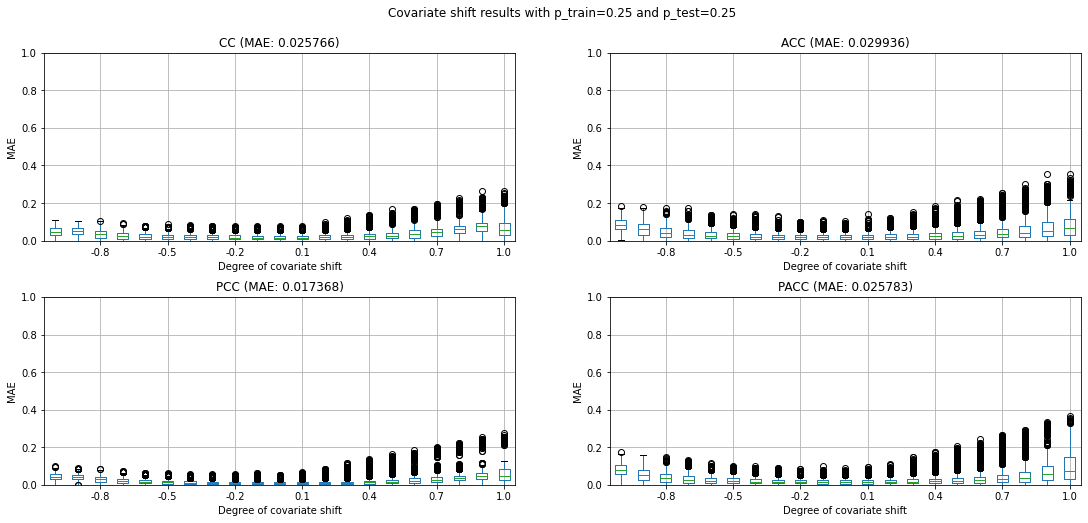

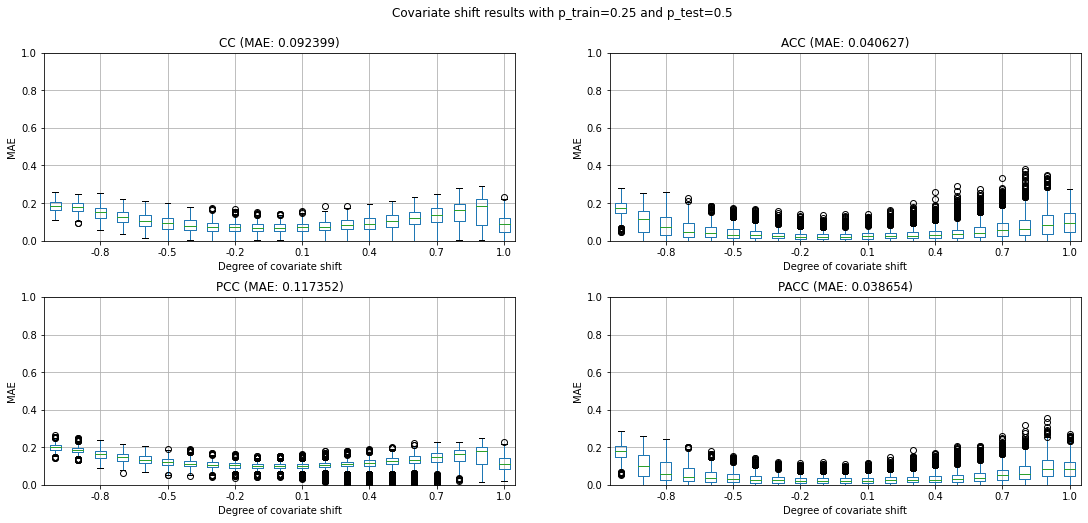

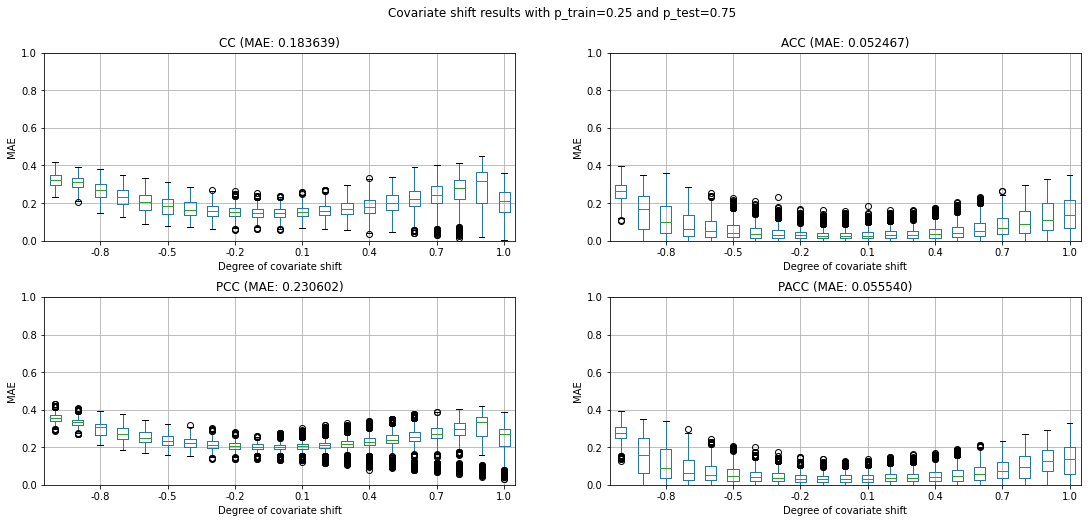

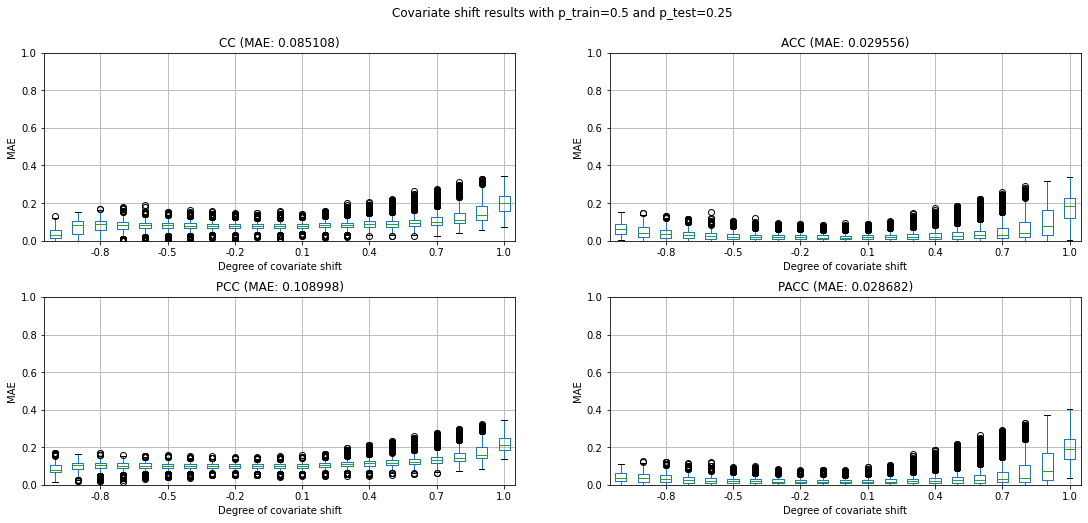

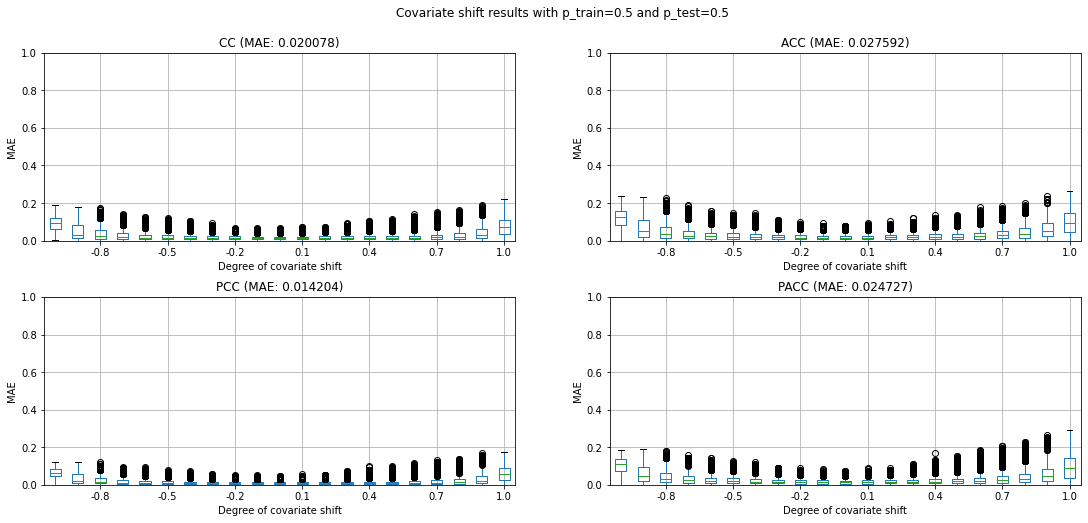

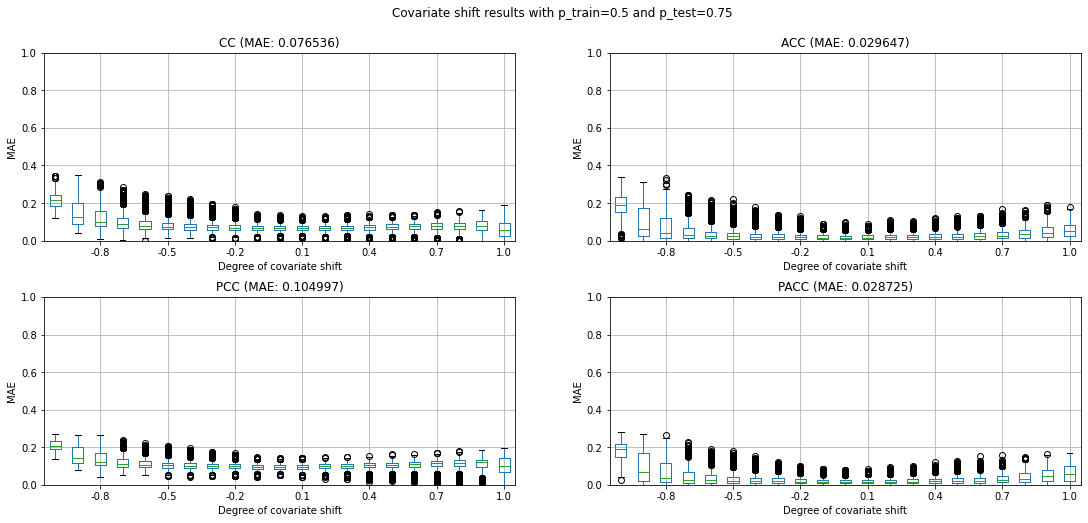

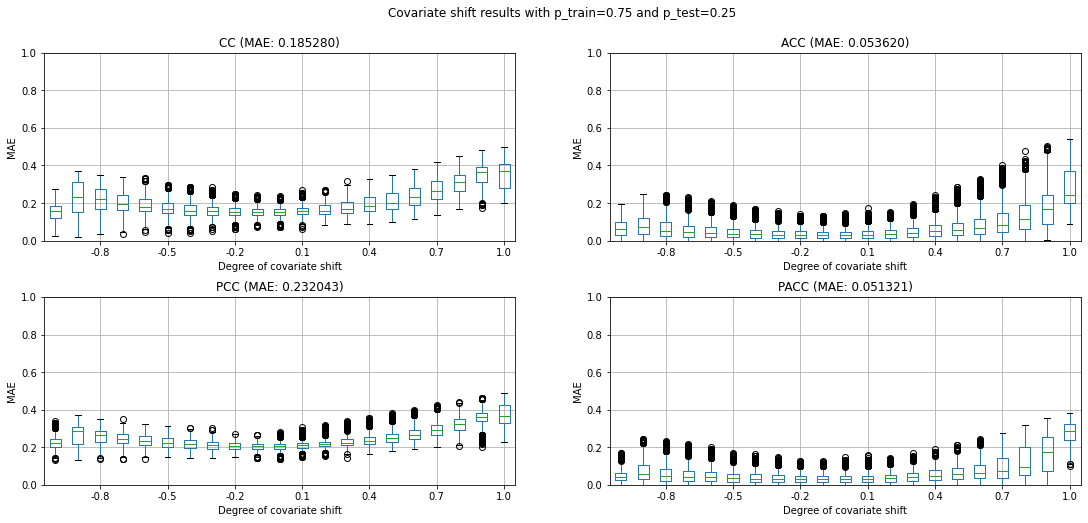

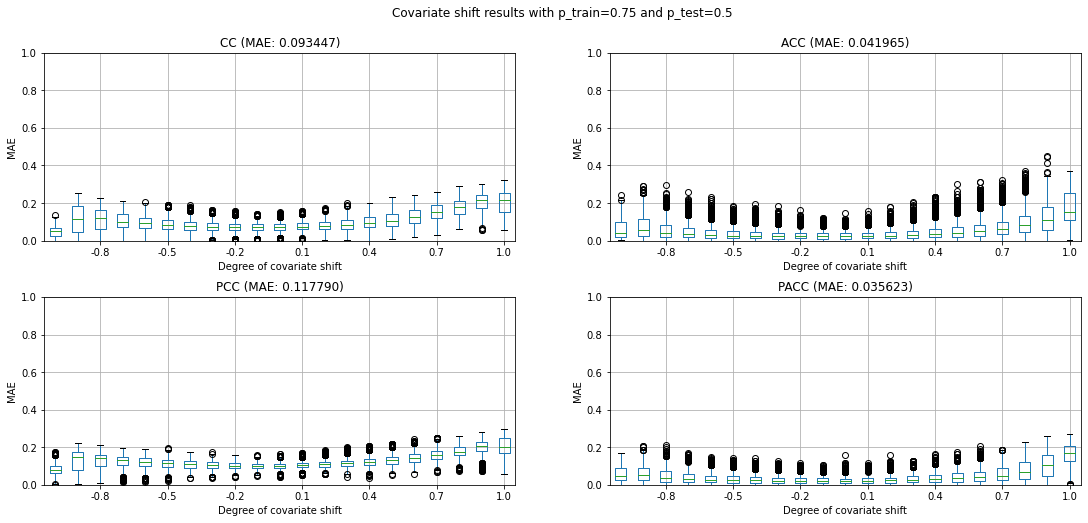

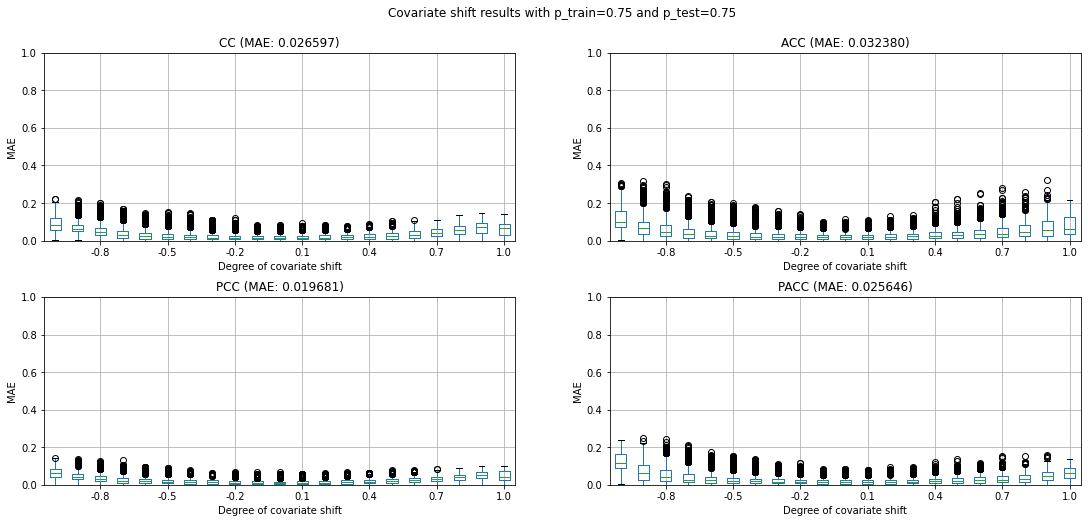

In [3]:
quantificators = ["CC", "ACC", "PCC", "PACC"]

n_cols=2
for p_train in ps_train:
    for p_test in ps_test:
        fig, ax = plt.subplots(2,n_cols,figsize=(18,8))
        plt.subplots_adjust(hspace=0.3)
        for k,quant_name in enumerate(quantificators):
            exp_id = "%s_%f_%f" % (quant_name, p_train, p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            ax[k//n_cols][k%n_cols].set_ylim(0, 1)
            ax[k//n_cols][k%n_cols].set_ylabel(error)
            results.boxplot(ax=ax[k//n_cols][k%n_cols],column='error',by='covariate_measure')
            ax[k//n_cols][k%n_cols].set_xlabel("Degree of covariate shift")
            ax[k//n_cols][k%n_cols].xaxis.set_major_locator(ticker.MultipleLocator(3))
            plt.suptitle('Covariate shift results with p_train={} and p_test={}'.format(p_train, p_test))
            ax[k//n_cols][k%n_cols].set_title("%s (%s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
        #plt.savefig(os.path.join(export_dir,"images/covariateresults{}_{}.pdf".format(p_train, p_test)),format='pdf')
        #plt.savefig(os.path.join(export_dir,"images/covariateresults{}_{}.png".format(p_train, p_test)),format='png')


## Shorter version of charts

Put a chart only with PCC and SLD which are a representation of methods for covariate

In [ ]:
# quantificators = ["PCC","SLD"]
# for i, p_train in enumerate(ps_train):
#     fig = plt.figure(figsize=(15,8))
#     subfigs = fig.subfigures(ncols=3,wspace=2)
#     plt.subplots_adjust(hspace=0.6)
    
#     for j, p_test in enumerate(ps_test):
#         axs = subfigs[j].subplots(nrows=2)
#         for k,quant_name in enumerate(quantificators):
#             exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
#             results = results_dict[quant_name]
#             results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
#             axs[k].set_ylim(0, 1)
#             axs[k].set_ylabel(error)
#             results.boxplot(ax=axs[k],column='error',by='covariate_measure')
#             axs[k].xaxis.set_major_locator(ticker.MultipleLocator(3))
#             axs[k].set_xlabel("Degree of covariate shift")
#             axs[k].set_title("%s (%s: %.3f)"  % (quant_name,error,mean_error_methods[exp_id]))
#         subfigs[j].suptitle('$p_{L}=%.2f$, $p_{U}=%.2f$' % (p_train,p_test))
#         if p_train==p_test:
#             subfigs[j].set_facecolor('0.85')
#         else:
#             subfigs[j].set_facecolor('0.97')

#     plt.savefig(os.path.join(export_dir,"images/covariatesummary_{}.pdf".format(p_train)),format='pdf',bbox_inches='tight')
#     plt.savefig(os.path.join(export_dir,"images/covariatesummary_{}.png".format(p_train)),format='png',bbox_inches='tight')

## Main tables for covariate shift in the paper

This will generate three tables for covariate shift. It is meant to be in the main paper.

In [ ]:
from utils.wilcoxon import wilcoxon_test

quantificators = ["CC", "ACC", "PCC", "PACC"]
global_results = {}
for i, p_train in enumerate(ps_train):
    columns = pd.MultiIndex.from_product([["p_test={}".format(p_test) for p_test in ps_test],quantificators])
    global_results[p_train] = pd.DataFrame(columns = columns,index=np.linspace(-1,1,21).round(1))
    for i, p_test in enumerate(ps_test):
        for k,quant_name in enumerate(quantificators):
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            results = results.groupby(by='covariate_measure')['error'].mean()
            global_results[p_train].loc[:, (["p_test={}".format(p_test)], [quant_name])] = results

global_results_style = {}
for p_train in ps_train:
    global_results_style[p_train] = global_results[p_train].style.format('{:.3f}').format_index('{:.1f}')

for p_train in ps_train:
    for p_test in ps_test:
        #We want to make a statistical test for each row, to compare methods for the same degree of covariate shift
        for i,r in global_results[p_train].loc[:, (["p_test={}".format(p_test)])].iterrows():
            #compute the best method for this experiment
            covariate_measure = r.name
            best = r.index[r.argmin()]
            p_test = float(best[0][7:])
            best_method = best[1]
            #print("Computing statistical test for experiment covariate degree=%f, p_test=%s. Winner method %s" % (covariate_measure,p_test,best_method))
            #Get data for the winner method
            results_best = results_dict[best_method].loc[(results_dict[best_method]['p_test']==p_test) & (results_dict[best_method]['p_train']==p_train) & (results_dict[best_method]['covariate_measure']==covariate_measure),'error'].to_numpy()
            #We need to get all the rows in results that matches this experiment for each method
            for quant_name in quantificators:
                if quant_name!=best_method:
                    results_method = results_dict[quant_name].loc[(results_dict[quant_name]['p_test']==p_test) & (results_dict[best_method]['p_train']==p_train) & (results_dict[quant_name]['covariate_measure']==covariate_measure),'error'].to_numpy()
                    global_results_style[p_train] = global_results_style[p_train].set_properties(subset=(covariate_measure, (best[0],quant_name)),**wilcoxon_test(results_best,results_method))
                    

for p_train in ps_train:
    columns = 'r'*len(quantificators)
    for p_test in ps_test:
        global_results_style[p_train] = global_results_style[p_train].highlight_min(axis=1,props='textbf:--rwrap;',subset=(["p_test={}".format(p_test)]))
        if p_test == p_train:
            global_results_style[p_train] = global_results_style[p_train].set_properties(cellcolor="{verylightgray}", subset=(["p_test={}".format(p_test)]))
    latex_code = global_results_style[p_train].to_latex(hrules=True,multicol_align='c',column_format='r|'+columns+'|'+columns+'|'+columns)
    latex_code = latex_code.replace(' 0.',' .').replace('{0.','{.')
    for p_test in ps_test:
        latex_code = latex_code.replace("p_test=%g" % p_test,"$p_{U}=%g$" % p_test)
    with open(os.path.join(export_dir,'tables/covariate_cluster_table_{}.tex'.format(p_train)), 'w') as f:
        f.write(latex_code)


## Tables to latex

All the tables for the suplemental material.

In [ ]:
# quantificators = ["CC", "ACC", "PCC", "PACC","DyS", "SLD"]
# mean_error_methods = {}
# for p_train in ps_train:
#     for p_test in ps_test:
#         for quant_name in quantificators:
#             exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
#             results = results_dict[quant_name]
#             results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
#             results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
#             #convert to matrix form
#             results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
#             results_mean.columns.name=None
#             results_mean.index.name=None
#             results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
#             mean_error_methods[exp_id]=results_mean.mean().mean()
#             cm = sns.light_palette('red', as_cmap=True)
#             f = open("tables/covariate/results_%s_%s_%s.tex" % (quant_name,p_train,p_test), "w")
#             label_name = "tab:covariate%s%.1f%.1f" % (quant_name,p_train,p_test)
#             label_name = label_name.replace(".","")
#             f.write(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1).to_latex(convert_css=True,
#                                     caption="Results for \emph{covariate shift} for method %s. In rows, \emph{covariate shift} grade for training set, in columns, \emph{covariate shift} grade for test sample. p_test: %f. Mean %s: %f." % (quant_name,p_test,error,mean_error_methods[exp_id]),
#                                     column_format='lccccccccccc', position='H',label=label_name))
#             f.close()